In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates
import missingno as msn



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/craigslist-carstrucks-data/vehicles.csv


In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
#import data
main_data = pd.read_csv("../input/craigslist-carstrucks-data/vehicles.csv")
main_data.shape

(423857, 25)

### Inspect data features

In [4]:
main_data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,1GTEK19T3YE366021,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,NaN,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,NaN,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,NaN,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,1GTHK23D57F102022,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [5]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   url           423857 non-null  object 
 2   region        423857 non-null  object 
 3   region_url    423857 non-null  object 
 4   price         423857 non-null  int64  
 5   year          328743 non-null  float64
 6   manufacturer  313242 non-null  object 
 7   model         325384 non-null  object 
 8   condition     176719 non-null  object 
 9   cylinders     197679 non-null  object 
 10  fuel          327214 non-null  object 
 11  odometer      270585 non-null  float64
 12  title_status  327759 non-null  object 
 13  transmission  328065 non-null  object 
 14  vin           184420 non-null  object 
 15  drive         231119 non-null  object 
 16  size          102627 non-null  object 
 17  type          241157 non-null  object 
 18  pain

# Possible EDA 
1. Informative columns for eda include
    * Region
    * price 
    * year
    * manufacturer
    * model
    * Condition
    * Cylinders
    * fuel
    * odometer
    * Title status
    * Transmission
    * Drive 
    * size
    * type
    * color
    * state - lat and logitude only describe a state

In [6]:
#create a eda data based on listed data features
eda_data = main_data.drop(columns=["url", "region_url", "vin", "image_url", "description", "county"])

In [7]:
eda_data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,7184791621,duluth / superior,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,mn,46.8433,-92.2550
1,7184773187,duluth / superior,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,mn,46.9074,-92.4638
2,7193375964,new haven,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,ct,41.1770,-73.1336
3,7195108810,albuquerque,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm,35.1868,-106.6650
4,7184712241,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn,45.6836,-92.9648


In [8]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   region        423857 non-null  object 
 2   price         423857 non-null  int64  
 3   year          328743 non-null  float64
 4   manufacturer  313242 non-null  object 
 5   model         325384 non-null  object 
 6   condition     176719 non-null  object 
 7   cylinders     197679 non-null  object 
 8   fuel          327214 non-null  object 
 9   odometer      270585 non-null  float64
 10  title_status  327759 non-null  object 
 11  transmission  328065 non-null  object 
 12  drive         231119 non-null  object 
 13  size          102627 non-null  object 
 14  type          241157 non-null  object 
 15  paint_color   222203 non-null  object 
 16  state         423857 non-null  object 
 17  lat           324404 non-null  float64
 18  long

### Preprocess data for EDA


In [9]:
"""numerical_data = eda_data.select_dtypes(include=['int64', 'float64']).columns
categorical_data = eda_data.select_dtypes(include=['object']).columns

#replace missing data
eda_data[numerical_data] = eda_data[numerical_data].dropna()
eda_data[categorical_data] = eda_data[categorical_data].fillna("missing")"""

'numerical_data = eda_data.select_dtypes(include=[\'int64\', \'float64\']).columns\ncategorical_data = eda_data.select_dtypes(include=[\'object\']).columns\n\n#replace missing data\neda_data[numerical_data] = eda_data[numerical_data].dropna()\neda_data[categorical_data] = eda_data[categorical_data].fillna("missing")'

In [10]:
#handle the cylinder column
eda_data["cylinders"] = eda_data["cylinders"].str[0]

In [11]:
eda_data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,7184791621,duluth / superior,6995,2000.0,gmc,new sierra 1500,excellent,8,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,mn,46.8433,-92.2550
1,7184773187,duluth / superior,8750,2013.0,hyundai,sonata,excellent,4,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,mn,46.9074,-92.4638
2,7193375964,new haven,10900,2013.0,toyota,prius,good,4,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,ct,41.1770,-73.1336
3,7195108810,albuquerque,12500,2003.0,mitsubishi,lancer,good,4,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm,35.1868,-106.6650
4,7184712241,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,good,8,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn,45.6836,-92.9648


In [12]:
#create car age column
eda_data["car_age"] = (2020 - eda_data["year"])

In [13]:
eda_data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,car_age
0,7184791621,duluth / superior,6995,2000.0,gmc,new sierra 1500,excellent,8,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,mn,46.8433,-92.2550,20.0
1,7184773187,duluth / superior,8750,2013.0,hyundai,sonata,excellent,4,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,mn,46.9074,-92.4638,7.0
2,7193375964,new haven,10900,2013.0,toyota,prius,good,4,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,ct,41.1770,-73.1336,7.0
3,7195108810,albuquerque,12500,2003.0,mitsubishi,lancer,good,4,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm,35.1868,-106.6650,17.0
4,7184712241,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,good,8,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn,45.6836,-92.9648,13.0


### start analysis from region


In [14]:
listed_cars = eda_data.groupby(['region'])['id'].count().to_frame(name="cars_count")
listed_cars = listed_cars.sort_values(by = ["cars_count"], ascending = False).reset_index()
print("datashape is {}".format(listed_cars.shape))

#plot the data
fig = px.bar(listed_cars, x=listed_cars.region, y=listed_cars.cars_count, title="Used cars per region")
fig.show()

datashape is (404, 2)


### **Observation**
* There ia a big difference in the distribution of listed cars in each region with columbus(3296) being the highest and fort smith,AR(1) being the lowest

### **inference**
* There could be a number of possible reasons why this is the case, one of which maybe be related to Columbus being the most populated city in the state of Ohio

In [15]:
listed_cars_price = eda_data.groupby(['region'])['price'].sum().to_frame(name="cars_price")
listed_cars_price = listed_cars_price.sort_values(by = ["cars_price"], ascending = False).reset_index()
print("datashape is {}".format(listed_cars_price.shape))

#plot the data
fig = px.bar(listed_cars_price, x=listed_cars_price.region, y=listed_cars_price.cars_price, title="Used cars per region")
fig.show()

datashape is (404, 2)


### **observation**
1. regions with high numbers of listed cars are not featured amongst the region with high sum of prices for listed cars. In fact, columbus with the highest number of listed cars appears pretty low on the price sum chart

In [16]:
listed_cars_price[listed_cars_price['region'] == 'columbus']

,region,cars_price
74,columbus,35928687


### **Inference**
This phenomena can be due to multiple reasons;

1. age of cars in the region
2. Fuel type
3. car condition
4. manufacturer
5. transmission type
6. car model and 
7. car cylinders
8.  

In [17]:
#age distribution of cars
age_region_distribution = eda_data.groupby(['region'])['car_age'].sum().to_frame(name = 'car_age_sum')
age_region_distribution = age_region_distribution.sort_values(by = ['car_age_sum'], ascending = False).reset_index()


In [18]:
fig = px.bar(age_region_distribution, x = age_region_distribution.region, y=age_region_distribution.car_age_sum, title=' Sum of age across regions')
fig.show()

### **Observation**
1. columbus which has a high count of listed cars and a low sum of listed car prices is observed to rank 3rd on the car age chart.
2. Pittsburgh also follow the columbus trend, along with other regions
3. flint which ranks 1st on the price list contains pretty young cars ranking 124th on the car age chart



In [19]:
age_region_distribution[age_region_distribution['region'] == 'flint']

,region,car_age_sum
124,flint,10194.0


### **Inference**
Older cars are more likely to cost low compared to younger cars

*  inspect further

In [20]:
eda_data['fuel'].value_counts()

gas         286775
diesel       24414
other        11311
hybrid        3737
electric       977
Name: fuel, dtype: int64

In [21]:
#fuel_type distribution of cars
fuel_type_distribution = eda_data.groupby(['region', 'fuel'])['fuel'].count().to_frame(name = 'fuel_type_count')
fuel_type_distribution = fuel_type_distribution.sort_values(by = ['fuel_type_count'], ascending = False).reset_index()


In [22]:
fuel_type_distribution.head()
gas_df = fuel_type_distribution[fuel_type_distribution['fuel'] == 'gas'].reset_index()
diesel_df = fuel_type_distribution[fuel_type_distribution['fuel'] == 'diesel'].reset_index()
other_df = fuel_type_distribution[fuel_type_distribution['fuel'] == 'other'].reset_index()
hybrid_df = fuel_type_distribution[fuel_type_distribution['fuel'] == 'hybrid'].reset_index()
electric_df = fuel_type_distribution[fuel_type_distribution['fuel'] == 'electric'].reset_index()

In [23]:
gas_df.head()

,index,region,fuel,fuel_type_count
0,0,south jersey,gas,2441
1,1,jacksonville,gas,2436
2,2,rochester,gas,2434
3,3,madison,gas,2380
4,4,norfolk / hampton roads,gas,2367


In [24]:
#check dominant fuel type

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=gas_df.region[:50], values=gas_df.fuel_type_count, name="gas"),
              1, 1)
fig.add_trace(go.Pie(labels=diesel_df.region[:50], values=diesel_df.fuel_type_count, name="diesel"),
              1, 2)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Fuel type distributions for GAS and DIESEL",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GAS', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='DIESEL', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

### **Observation**
1. regions that appear high on the listed cars chart and low on the price sum chart appear to mostly make use of gas and diesel as their source of fuel. columbus and pittsburgh are the evidence

### **inference**

2. cars with lesser gas and diesel fuel types cost less than other fuel types

In [25]:
#check dominant fuel type

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=electric_df.region[:50], values=electric_df.fuel_type_count, name="electric"),
              1, 1)
fig.add_trace(go.Pie(labels=hybrid_df.region[:50], values=hybrid_df.fuel_type_count, name="hybrid"),
              1, 2)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Fuel type distributions for ELECTRIC and HYBRID",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='ELECTRIC', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='HYBRID', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [26]:
#check dominant fuel type

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=other_df.region[:50], values=other_df.fuel_type_count, name="other"),
              1, 1)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Fuel type distributions for OTHERS",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='OTHERS', x=0.18, y=0.5, font_size=20, showarrow=False)])
fig.show()

### **Observation**
1. the region with highest price rating features on the others fuel type

### **inference**
* cars with scarce furl types currently cost more


Inspect further

In [27]:
#group data by condition and prices
condition_df = eda_data.groupby(['condition'])['price'].sum().to_frame(name = 'condition_avg_price')
condition_df = condition_df.sort_values(by = ['condition_avg_price'], ascending = False).reset_index()

In [28]:
fig = px.bar(condition_df, x = 'condition', y = 'condition_avg_price', color = 'condition_avg_price')
fig.show()

### **Observation**
1. surprisingly, the price sum for cars in a good condition is observed to be much more higher than that of excellent and cars that almost new

### **inference**
1. this observation could be due to the share number of good cars that are listed

inspect further

In [29]:
#group data by condition and count
condition_count_df = eda_data.groupby(['condition'])['condition'].count().to_frame(name = 'count')
condition_count_df = condition_count_df.sort_values(by = ['count'], ascending = False).reset_index()

In [30]:
fig = px.bar(condition_count_df, x = 'condition', y = 'count', color = 'count')
fig.show()

### **Observation**
1. the number of excellent cars actually surpasses that of good cars by almost 20000 

#### **Inference**
* which implies that, good cars receive better prices than excellent cars
* The transmission type, cylinder_type and title status may affect these figures. 

inspect further

In [31]:
condition_transmission = eda_data.groupby(['condition', 'transmission'])['transmission'].count().to_frame(name = 'count')
condition_transmission = condition_transmission.sort_values(by = ['count'], ascending = False).reset_index()

In [32]:
fig = px.scatter(condition_transmission, x="condition", y="count", size="count", color="transmission",
                 hover_name="transmission", size_max=100)
fig.show()

### **observation**
1. automatic and manual transmission types across the excellent and good vehicles seems evenly distributed
2. cars classified as good contains more "others" transmission types
3. majority of the others transmission categories fall under good condition

### **Inference**
1. Others category in transmission types can vary among specialised vehicles used for sport and its likes. visit this [website](https://www.autodeal.com.ph/articles/car-features/here-are-different-types-automatic-transmissions) for more information

2. Others category of transmission type seems to be one of the stand-out factors in determining the price of a car

Inspect further

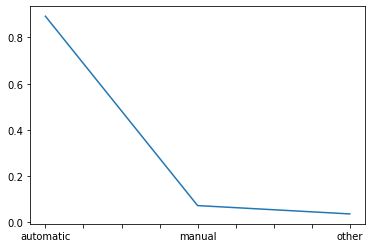

In [33]:
#check transmission type counts
eda_data["transmission"].value_counts(normalize = True).plot()

In [34]:
#check transmission type price
transmission_type_price = eda_data.groupby(['transmission'])['price'].sum().to_frame(name = 'transmission_price')
transmission_type_price = transmission_type_price.sort_values(by = ['transmission_price'], ascending= False).reset_index()

In [35]:
fig = px.bar(transmission_type_price, x = 'transmission', y='transmission_price', color = 'transmission_price')
fig.show()

### **Next, analysis between cylinder, drive and price**


In [36]:
cylinder_drive = eda_data.groupby(['cylinders', 'drive'])['price'].sum().to_frame(name="price")
cylinder_drive = cylinder_drive.sort_values(by = ['price']).reset_index()

In [37]:
cylinder_drive.head()

,cylinders,drive,price
0,1,fwd,249162
1,3,rwd,459437
2,3,4wd,772583
3,5,rwd,1541194
4,3,fwd,2458100


In [38]:
fig = px.scatter(cylinder_drive, x="cylinders", y="drive", size="price", color="cylinders",
                 hover_name="drive", size_max=100)
fig.show()

# Geographical Analysis - analysis ongoing

In [39]:
map_data = eda_data[['lat', 'long', 'state', 'price']]

In [40]:
map_data.shape

(423857, 4)

In [41]:
map_data = map_data.iloc[:100000 , :]

In [42]:
map_data.shape

(100000, 4)

In [43]:
fig = px.scatter_geo(map_data, lat=map_data.lat, lon=map_data.long, size="price",
                     projection="natural earth")
fig.show()